<a href="https://colab.research.google.com/github/ssongplay/Manufacturing-System-lab/blob/main/SampleSuperstore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생산시스템구축실무 기말 프로젝트

**🌼Sample - Superstore 데이터 분석🌼**

2019146018 송연주

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Manufacturing-System-lab/Project/Sample - Superstore.csv')

In [4]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f4e9fff90>,
      dtype=object)

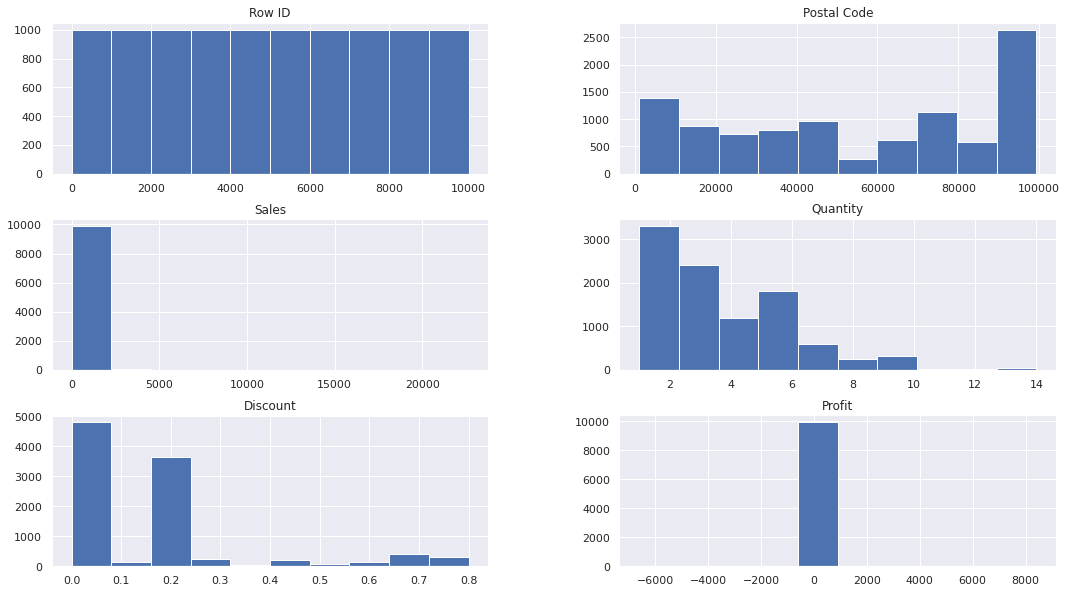

In [5]:
data.hist(bins=10, figsize=(18,10))

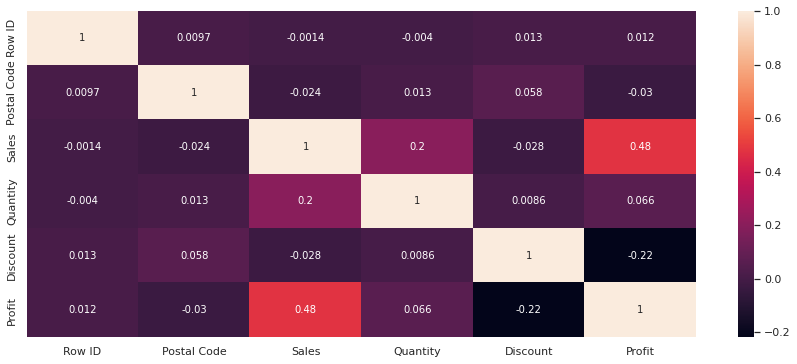

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

**▶️ Profit과 Discount는 음의 correlation을, Profit과 Sales는 양의 correlation을 갖는다.**

---

# 1. Ship Mode 분석

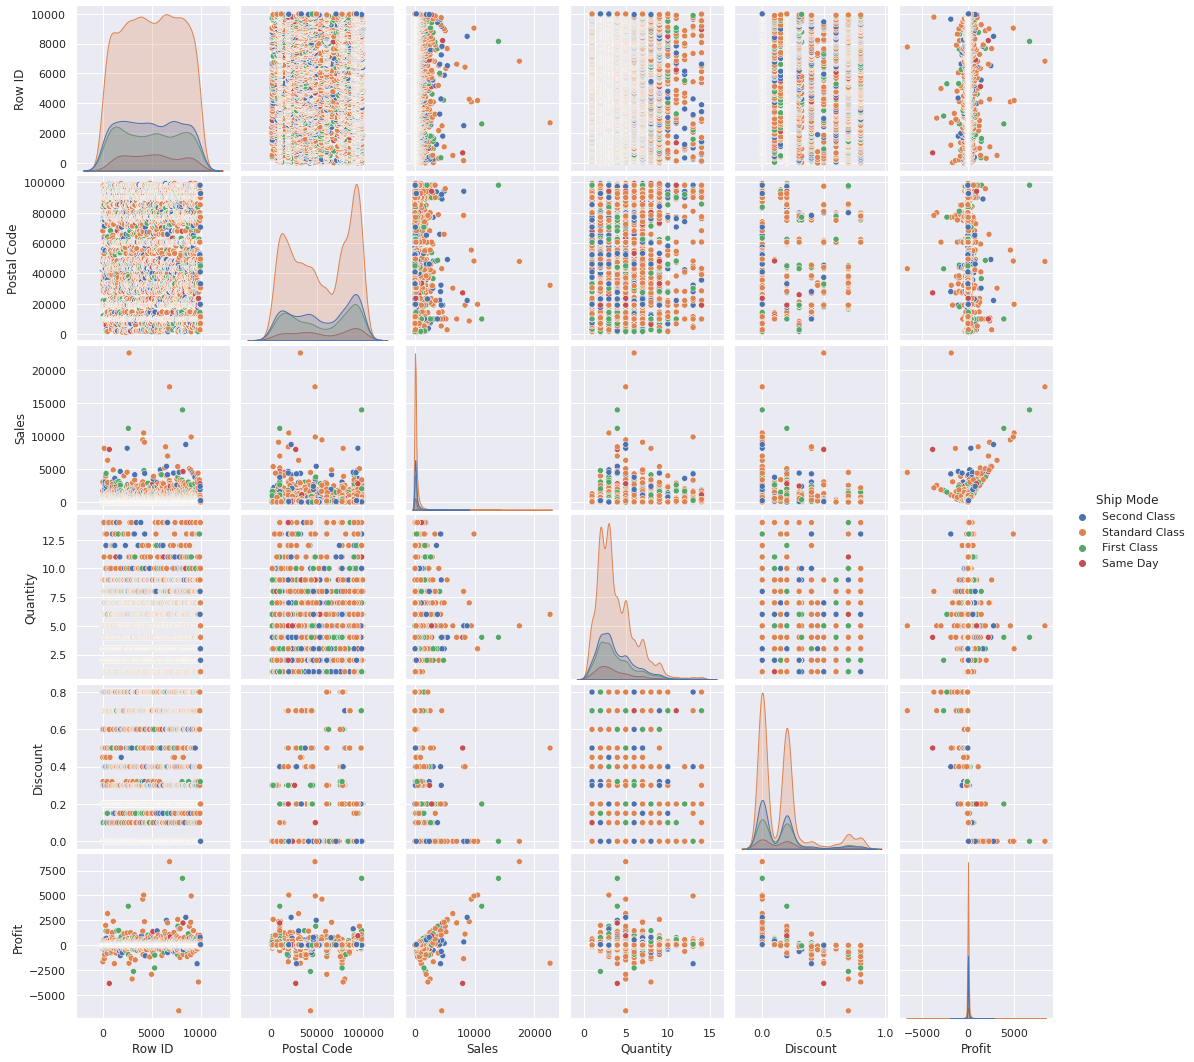

In [7]:
sns.pairplot(data, hue='Ship Mode')

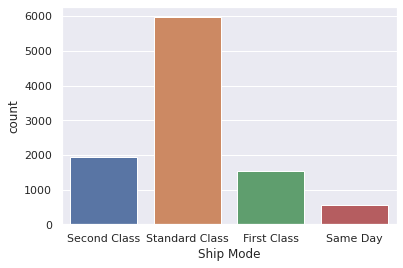

In [8]:
sns.countplot(x='Ship Mode', data=data)

In [9]:
data_shipmode = data.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
data_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


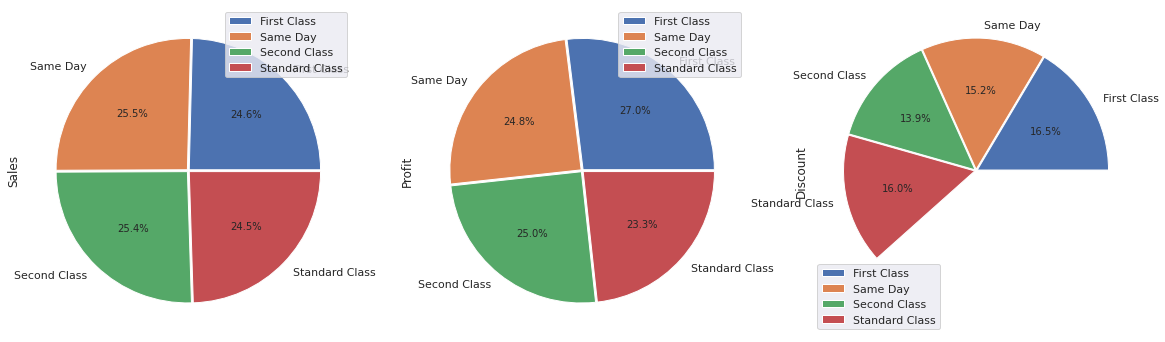

In [10]:
data_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

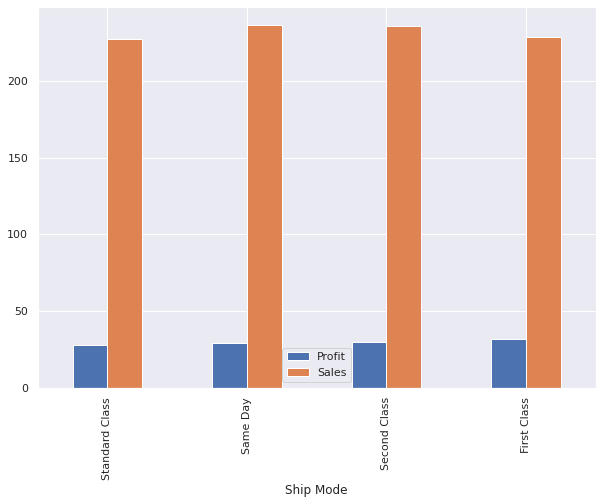

In [11]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

In [12]:
data_shipmode.sum(axis=0)

Sales       928.565508
Profit      118.136854
Discount      0.615922
dtype: float64

In [13]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%'] = data_shipmode['Profit']/1.181

In [14]:
data_shipmode.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,227.583067,27.494770,0.160023,24.510831,23.280923
Same Day,236.396179,29.266591,0.152394,25.460008,24.781195
Second Class,236.089239,29.535545,0.138895,25.426951,25.008929
First Class,228.497024,31.839948,0.164610,24.609265,26.960159


### Sales 
- Lowest sales : Standard Class (24.51%)
- Highest sales : Same Day (25.46%)

### Profit
- Lowest profit : Standard Class (23.28%)
- Highest profit : First class (26.96%)

**▶️ Standard Class의 매출과 이익 모두 가장 낮은 이유를 확인해볼 필요가 있다.**

---

# 2. Segment 분석

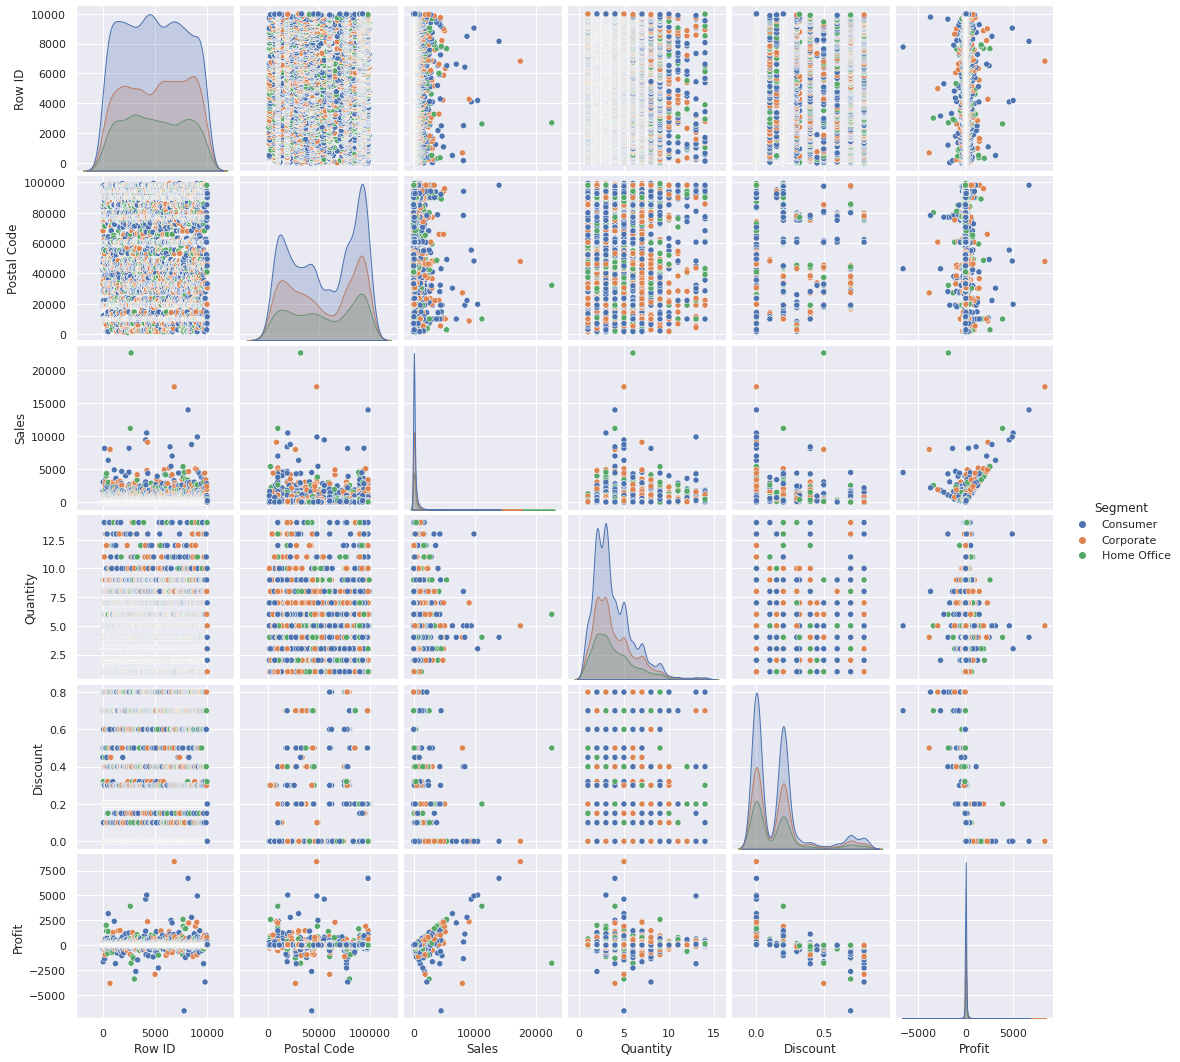

In [15]:
sns.pairplot(data, hue='Segment')

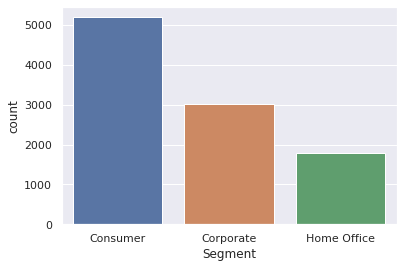

In [16]:
sns.countplot(x='Segment', data=data)

In [17]:
data_segment = data.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f48907550>,
      dtype=object)

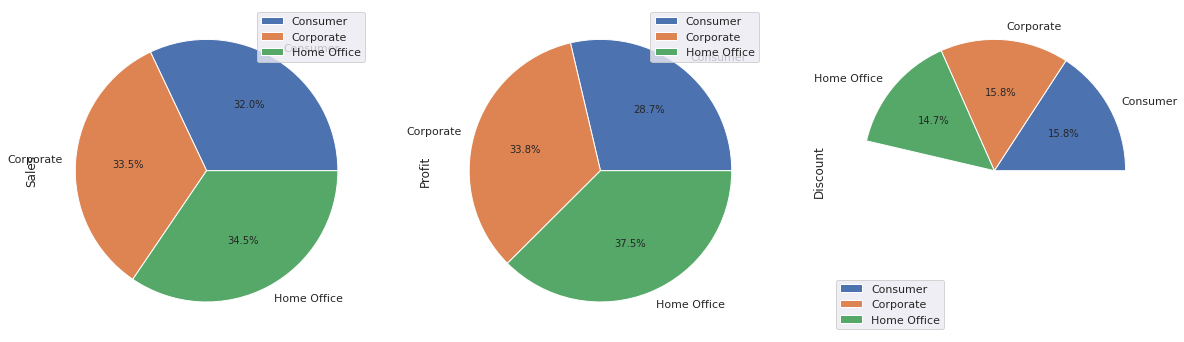

In [18]:
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%')

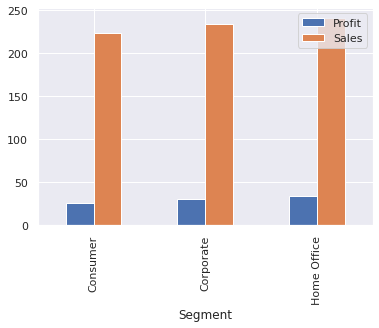

In [19]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

In [20]:
data_segment.sum(axis=0)

Sales       698.528985
Profit       90.112204
Discount      0.463498
dtype: float64

In [21]:
data_segment['Sales%'] = data_segment['Sales']/6.985
data_segment['Profit%'] = data_segment['Profit']/0.9011

In [22]:
data_segment.sort_values('Profit')

,Sales,Profit,Discount,Sales%,Profit%
Segment,,,,,
Consumer,223.733644,25.836873,0.158141,32.030586,28.672593
Corporate,233.823300,30.456667,0.158228,33.475061,33.799431
Home Office,240.972041,33.818664,0.147128,34.498503,37.530423


### Sales
- Lowest sales : Consumer (32.03%)
- Highest sales : Home Office (34.49%)

### Profit
- Lowest profit : Consumer (28.67%)
- Highest profit : Home Office (37.53%)

**▶️ Consumer의 매출과 이익이 가장 낮은 이유를 분석할 필요가 있다.**

--- 

# 3. State 분석

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

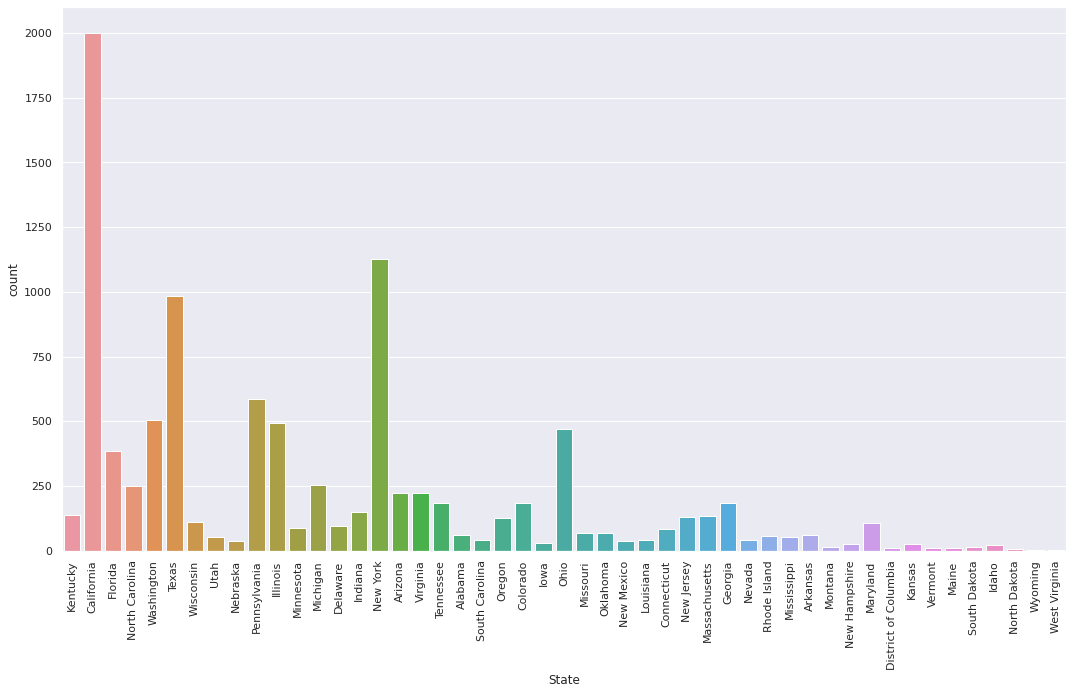

In [23]:
plt.figure(figsize=(18,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)

In [24]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])

In [26]:
state_data = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

In [27]:
data_state = data.groupby(['State'])[['Sales','Profit','Discount']].mean()

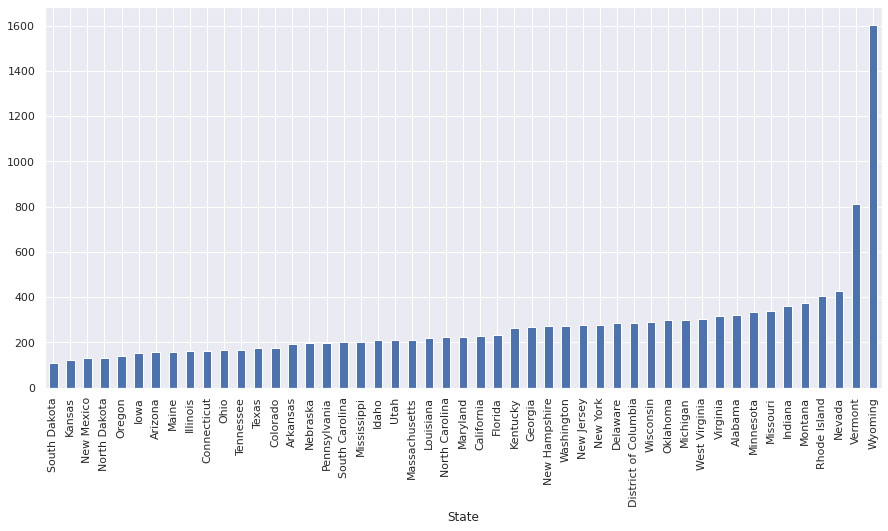

In [28]:
data_state.sort_values('Sales')['Sales'].plot(kind='bar', figsize=(15,7))

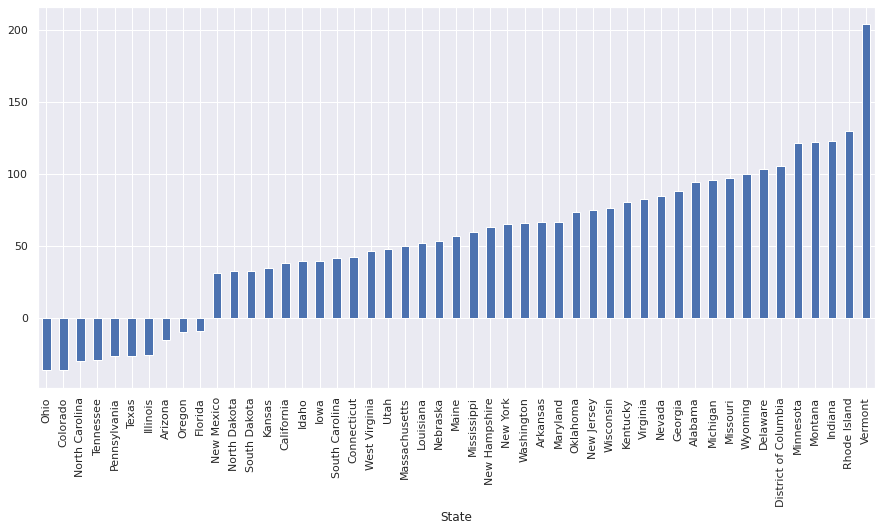

In [29]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))

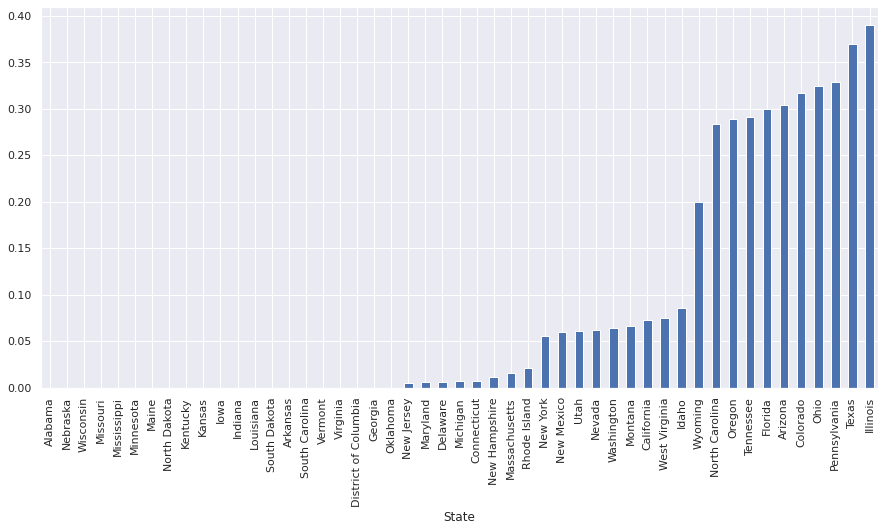

In [30]:
data_state.sort_values('Discount')['Discount'].plot(kind='bar', figsize=(15,7))

In [31]:
data_state.sum(axis=0)

Sales       13545.408037
Profit       2648.344280
Discount        4.076625
dtype: float64

In [32]:
data_state['Sales%'] = data_state['Sales']/135.454
data_state['Profit%'] = data_state['Profit']/26.483

In [33]:
data_state.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
State,,,,,
Ohio,166.861697,-36.186304,0.324947,1.231870,-1.366397
Colorado,176.418231,-35.867351,0.316484,1.302422,-1.354354
North Carolina,223.305880,-30.083985,0.283534,1.648574,-1.135973
Tennessee,167.551219,-29.189583,0.291257,1.236960,-1.102201
Pennsylvania,198.487077,-26.507598,0.328620,1.465347,-1.000929
Texas,172.779742,-26.121174,0.370193,1.275560,-0.986337
Illinois,162.939230,-25.625787,0.390041,1.202912,-0.967632
Arizona,157.508933,-15.303235,0.303571,1.162822,-0.577851
Oregon,140.573790,-9.600569,0.288710,1.037797,-0.362518


In [34]:
print(min(data_state['Sales%']))
print(max(data_state['Sales%']))

0.8093522524251775
11.835279873610228


In [35]:
#plotting profit v/s sales statewise
profit_to_sales = pd.DataFrame(data.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales',inplace = True, ascending = False)
print("Highest 10 Ratios :\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios:\n")
print(profit_to_sales[-10:])

Highest 10 Ratios :

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              76269.614  24463.1876         0.320746
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17431.1500  -1190.4705        -0.068296


### Sales
- Lowest sales : South Dekota (0.81%)
- Highest sales : Wyoming (11.84%)

### Profit
- Lowest profit : Ohio (-1.36%)
- Highest profit : Vermont (7.7%)

**▶️ 이익이 가장 낮은 Ohio 주를 포함한 10개의 주가 손실을 내고 있다. 이에 대한 원인을 분석할 필요가 있다.**

**▶️Sales-to-profit ratio를 살펴보면 알 수 있듯이, Sales가 높다고 해서 무조건 좋은 것은 아니다.**

---

# 4. Region 분석

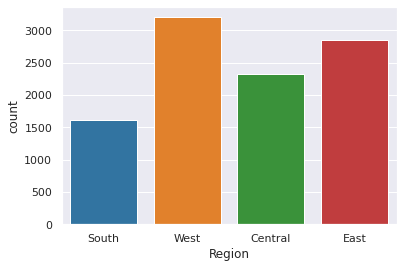

In [36]:
sns.countplot(data['Region'], palette='tab10')

In [37]:
data_region2 = data.groupby(['Region'])[['Sales','Profit']].mean()

In [38]:
data_region2

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ec7e76590>,
      dtype=object)

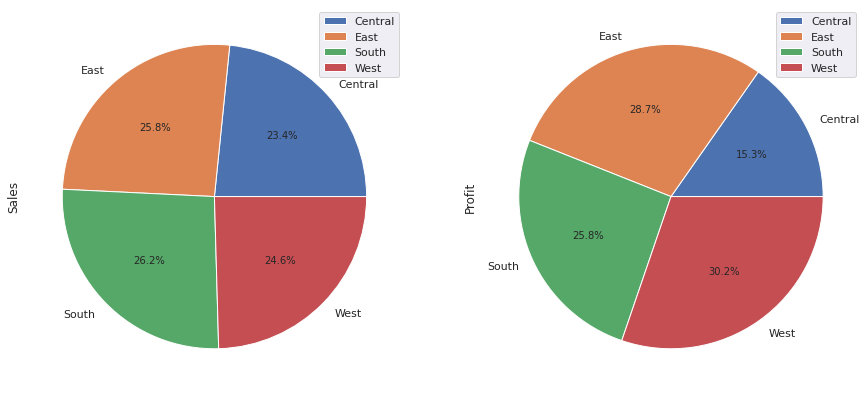

In [39]:
data_region2.plot.pie(subplots=True, figsize=(15,7), autopct='%1.1f%%', label=data_region2.index.values)

In [40]:
data_region2.sum(axis=0)

Sales     922.405648
Profit    111.935221
dtype: float64

In [41]:
data_region2['Sales%'] = data_region2['Sales']/9.224
data_region2['Profit%'] = data_region2['Profit']/1.119

In [42]:
data_region2.sort_values('Profit')

,Sales,Profit,Sales%,Profit%
Region,,,,
Central,215.772661,17.092709,23.392526,15.274986
South,241.803645,28.857673,26.214619,25.788805
East,238.336110,32.135808,25.838694,28.718327
West,226.493233,33.849032,24.554774,30.249358


### Sales
- Lowest sales : Central (23.39%)
- Highest sales : South (26.21%)

### Profit
- Lowest profit : Central (15.27%)
- Highest Profit : West (30.25%)

**▶️ West가 Central보다 약 두배의 이익을 낸다. Central의 매출과 이익이 모두 가장 낮은 원인을 분석해보면 좋을 것이다.**

---

# 5. Category (Sub Category) 분석

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

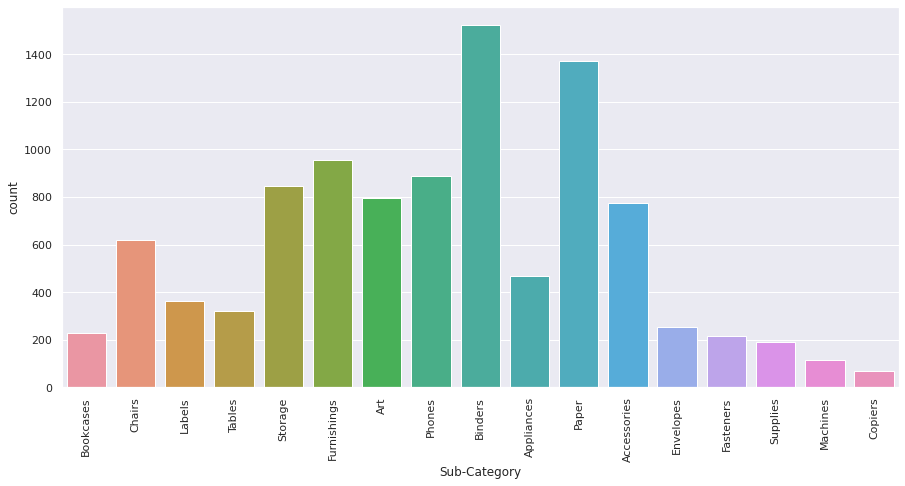

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=90)

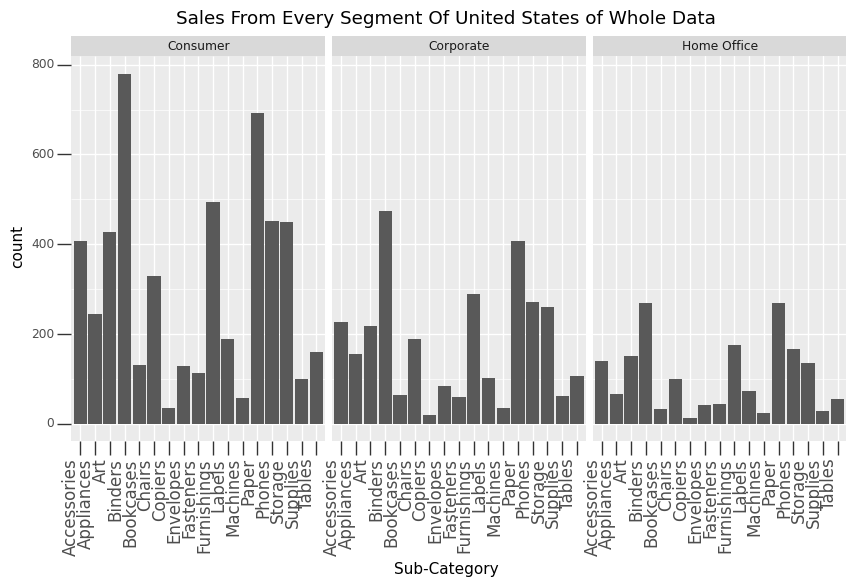

<ggplot: (8748521028641)>

In [44]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

**▶️ 위 그래프를 보면, Home Office에서 구매 횟수가 가장 적고, Consumer에서 가장 많다.**

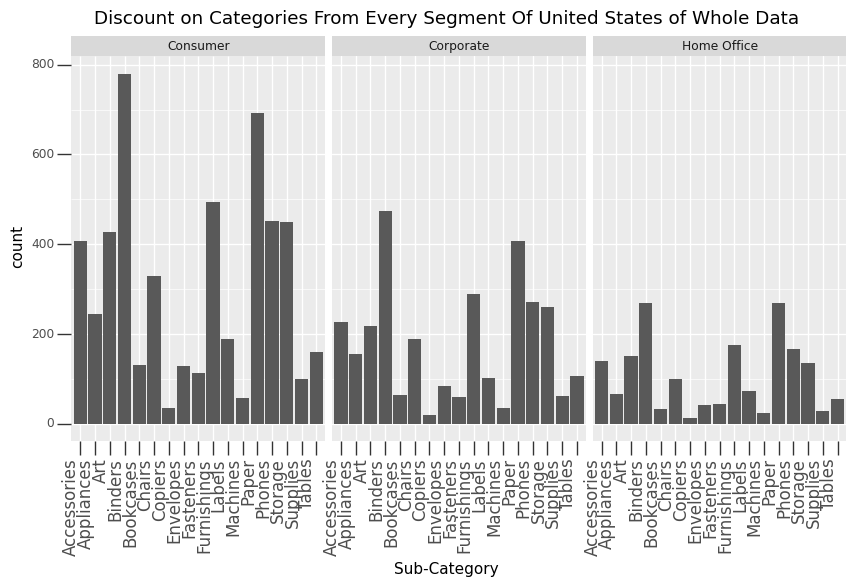

<ggplot: (8748521028789)>

In [45]:
# 할인 횟수
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

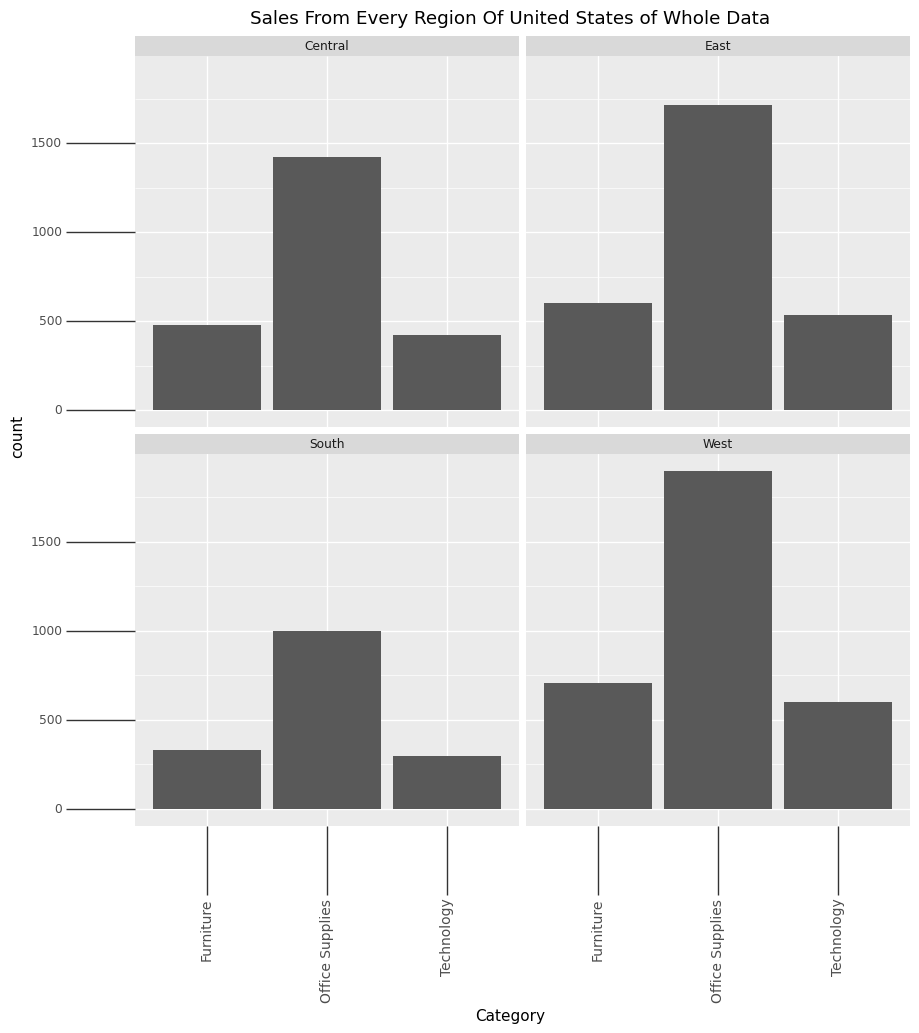

<ggplot: (8748521445817)>

In [46]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(data.drop(['Postal Code'], axis=1), aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

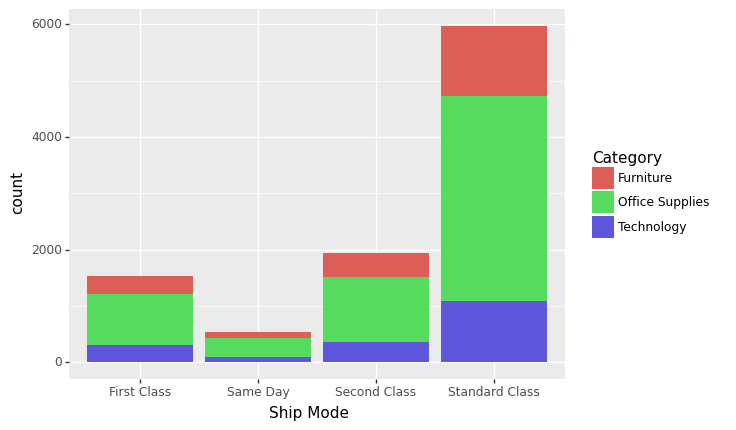

<ggplot: (8748520969161)>

In [47]:
# Ship Mode에 따른 Category
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

In [48]:
data_subcat = data.groupby(['Sub-Category'])[['Sales','Profit']].mean()

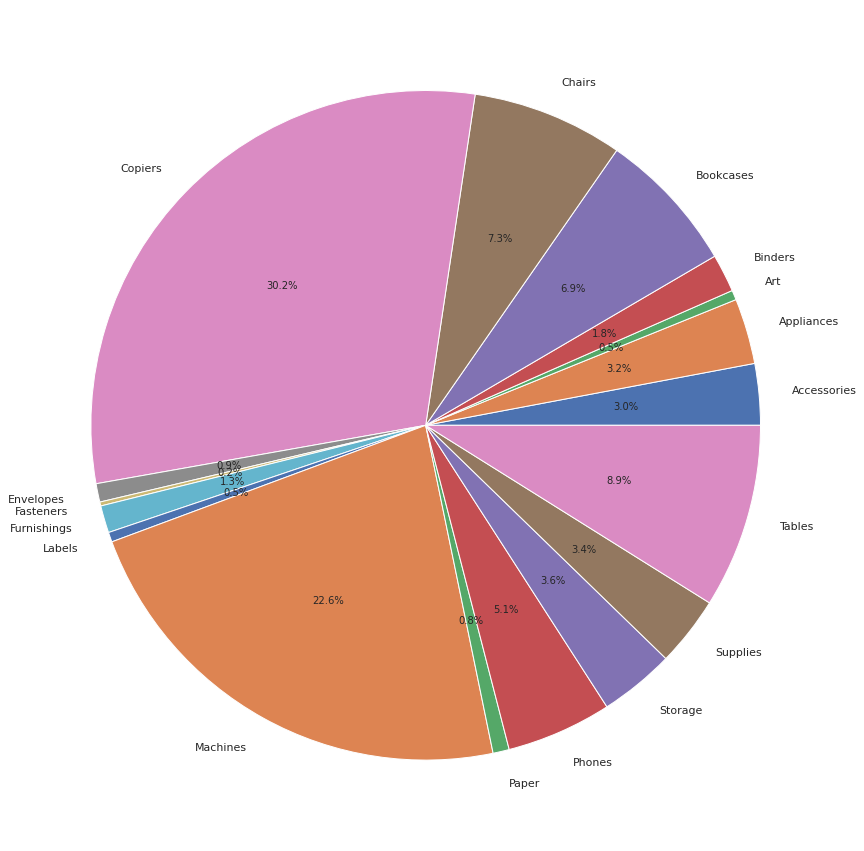

In [49]:
# sales for sub categories
plt.figure(figsize=(15,18))
plt.pie(data_subcat['Sales'], labels = data_subcat.index, autopct='%1.1f%%')
plt.show()

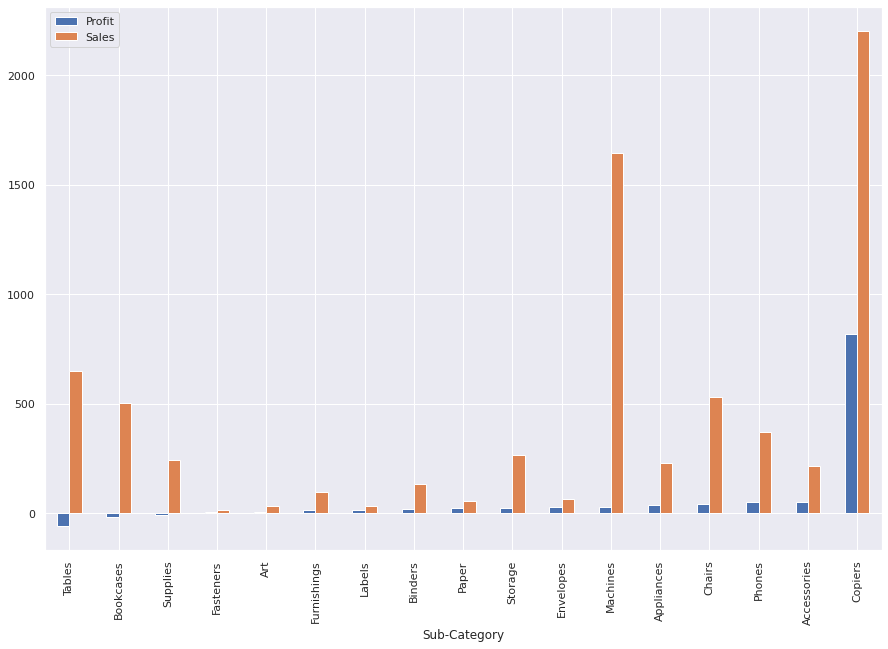

In [50]:
# profits for sub categories
data_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

In [51]:
data_subcat.sum(axis=0)

Sales     7291.511064
Profit    1095.221304
dtype: float64

In [52]:
data_subcat['Sales%'] = data_subcat['Sales']/72.915
data_subcat['Profit%'] = data_subcat['Profit']/10.952

In [53]:
data_subcat.sort_values('Profit%')

,Sales,Profit,Sales%,Profit%
Sub-Category,,,,
Tables,648.794771,-55.565771,8.897960,-5.073573
Bookcases,503.859633,-15.230509,6.910233,-1.390660
Supplies,245.650200,-6.258418,3.368994,-0.571441
Fasteners,13.936774,4.375660,0.191137,0.399531
Art,34.068834,8.200737,0.467240,0.748789
Furnishings,95.825668,13.645918,1.314211,1.245975
Labels,34.303055,15.236962,0.470453,1.391249
Binders,133.560560,19.843574,1.831730,1.811868
Paper,57.284092,24.856620,0.785628,2.269596


In [54]:
print(min(data_subcat['Sales%']))
print(max(data_subcat['Sales%']))

0.19113727207773965
30.157602930083776


### Sales
- Lowest Sales : Fasteners (0.19%)
- Highest Sales : Copiers (30.15%)

### Profit
- Lowest profit : Tables (-5.07%)
- Highest profit : Copiers (74.68%)


**▶️ 매출과 이익 모두 copier의 영향을 매우 많이 받는다.**

**▶️ tables는 손실이 크기 때문에 판매를 중단하는 것이 좋을 것이다.**

---

### State에 따른 Category 분석

몇 개의 state를 살펴보며 Sales에 영향을 미치는 주요 요소를 찾아볼 수 있을 것이다.

Q1. 높은 이익을 내는 주에서는 주로 어떤 제품이 잘 팔리는가?

Q2. loss를 부담하는 주에서는 주로 어떤 제품을 구매하는가?

Q3. 이익을 높이기 위해서 어떤 Segment 제품을 개선시켜야 하는가?

In [55]:
sample1 = data.drop(columns=['Postal Code'],axis=1)
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = sample1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

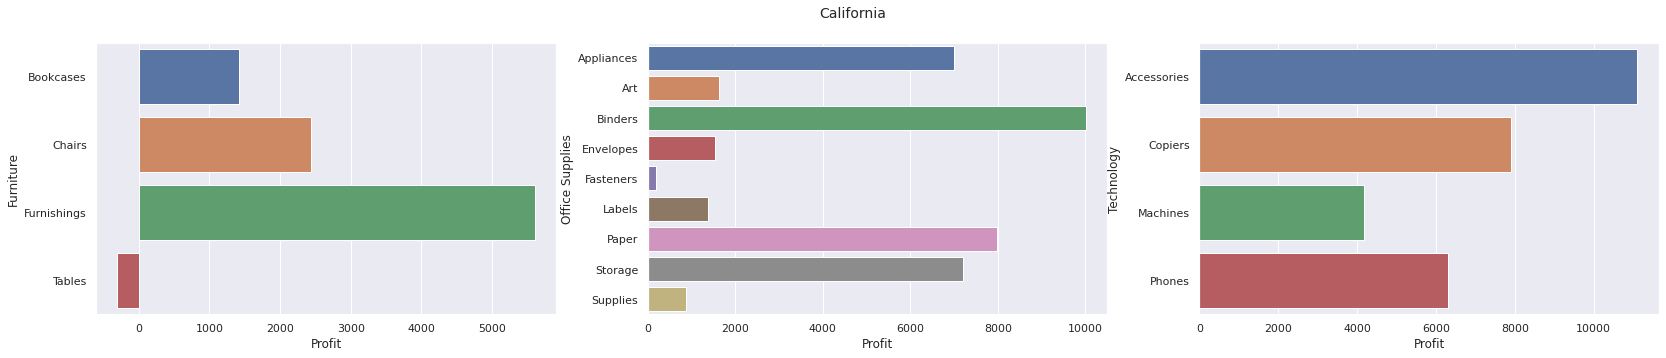

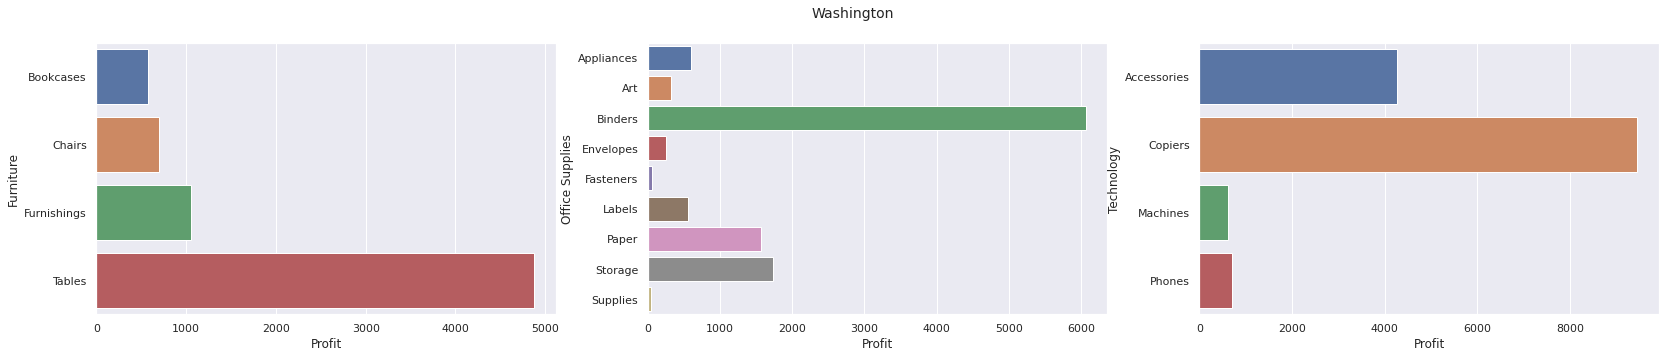

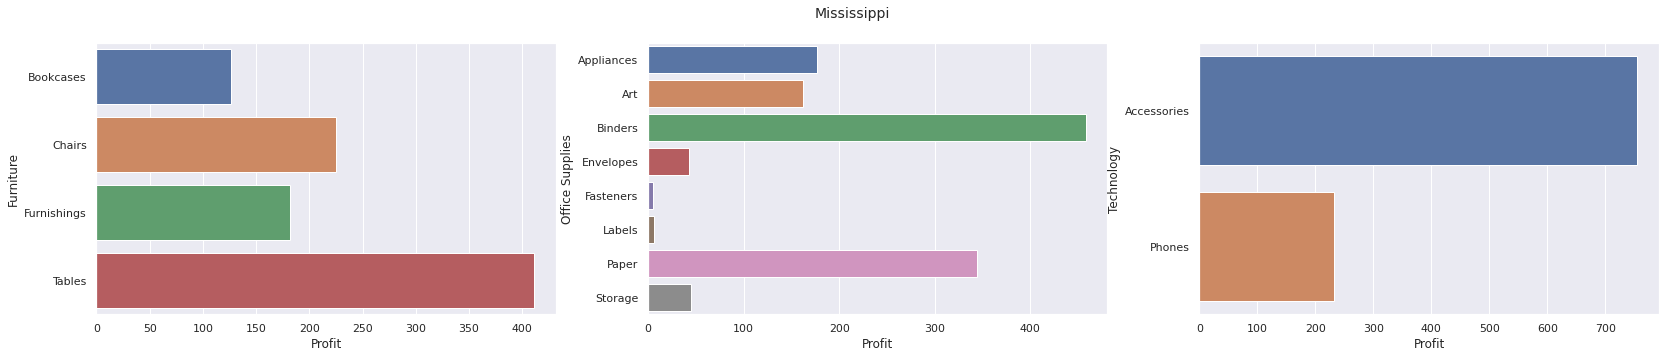

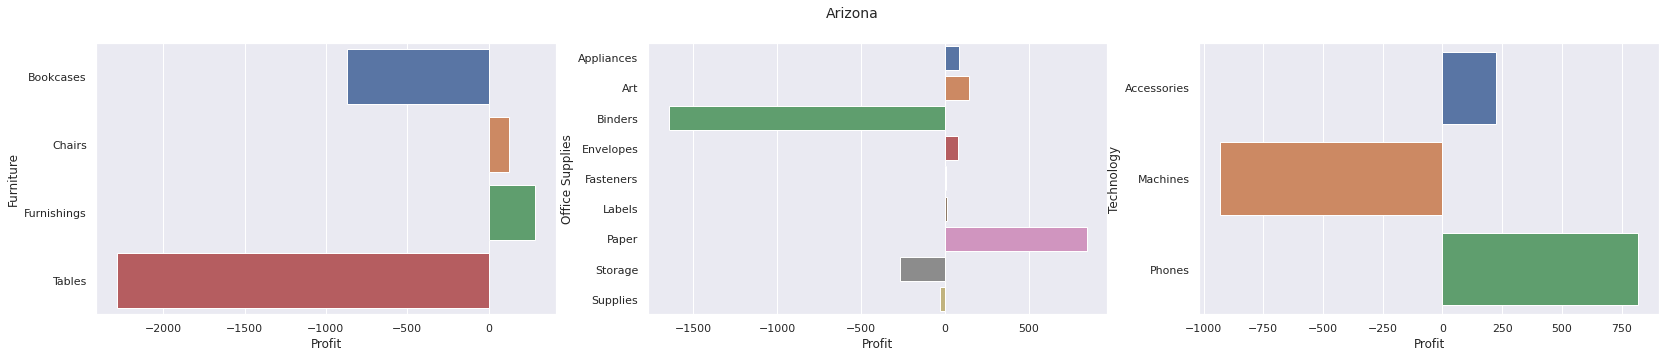

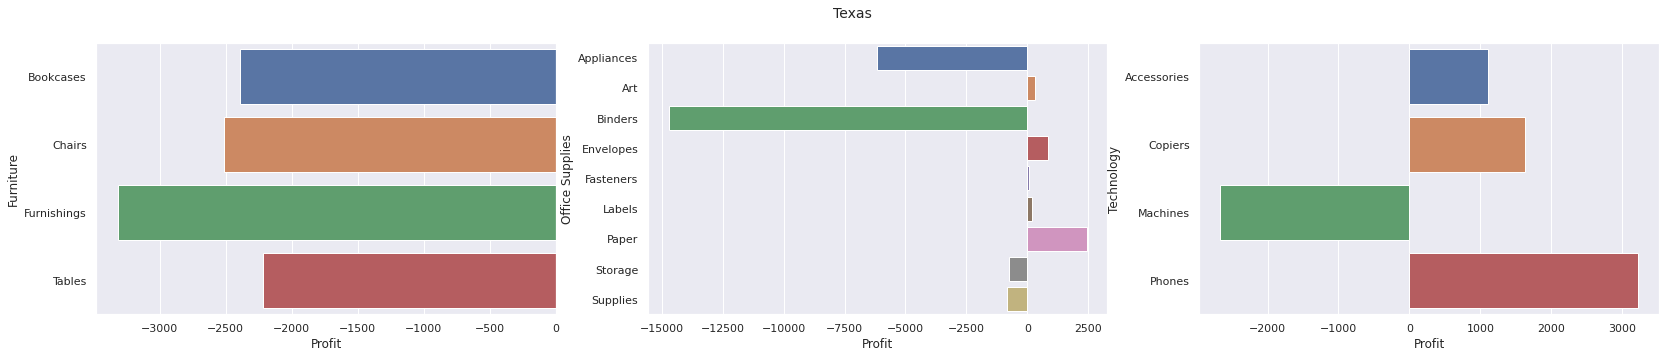

In [56]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

### K-means Clustering을 통한 분석
- K-means Clustering이란 ? : 데이터를 K 개의 군집으로 나눈 후 각 K개의 군집중심과의 거리를 구함으로써 이상치를 찾음

In [57]:
x = data.iloc[:, [17, 18, 19, 20]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

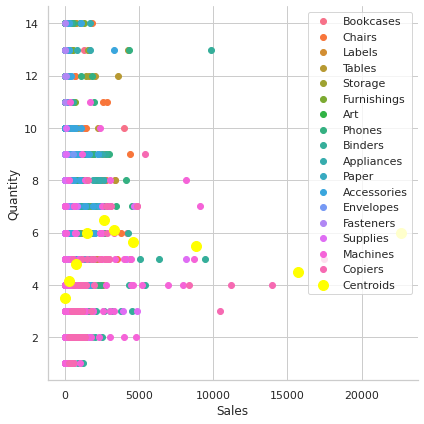

In [58]:
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

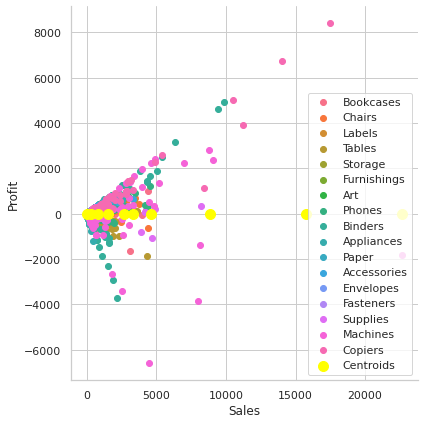

In [59]:
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

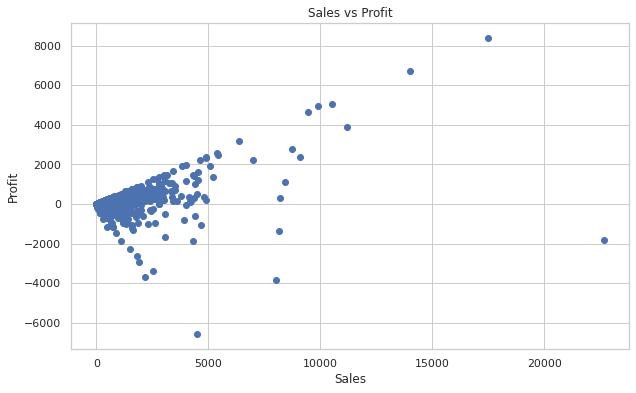

In [60]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(data["Sales"] , data["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

🌼 앞서 진행한 시각화 및 분석을 통해, 어느 state와 category에서 sales, profit이 높은지 확인해볼 수 있다. 이에 따라 **어느 정도의 범위에서 할인을 제공**하면 각 state의 profit이 높아질 수 있는지 모델링 및 최적화를 통해 의사결정을 내릴 수 있을 것이다.